# K Means Clustering

## **Description**
To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

## Packages used
- matplotlib.pyplot
- numpy
- pandas
- sklearn

In [114]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Read in data set

In [115]:
df = pd.read_csv("Fish.csv")

In [116]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [117]:
df.dtypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [118]:
df2 = df.iloc[:160][["Height", "Width",'Species']]
df2.head()
df2.dtypes

Height     float64
Width      float64
Species     object
dtype: object

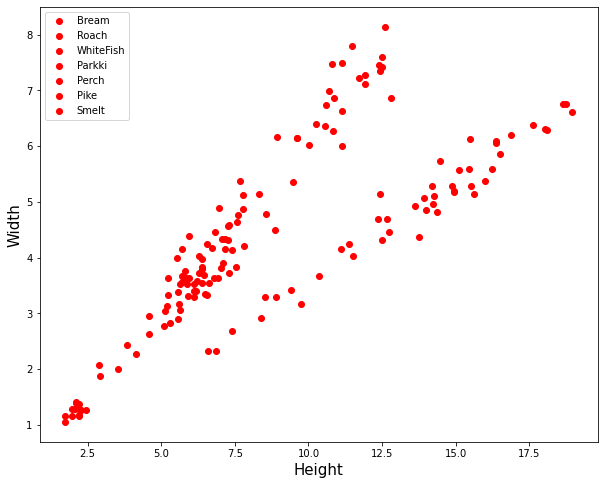

In [119]:
X = df[['Height','Width']].to_numpy()
# Define labeling function

y = df[["Species"]].to_numpy()
def colors(y):
    if y == 'Bream':
        return "red"
    elif y == 'Roach':
        return "lightseagreen"
    elif y == 'WhiteFish':
        return "magenta"
    elif y=='Parkki':
        return "blue"
    elif y=='Perch':
        return "grey"
    elif y=='Pike':
        return "orange"
    else:
        return "yellow"

c = [colors(label) for label in y]
# Plot the data
age = ["Bream", "Roach",'WhiteFish','Parkki','Perch','Pike','Smelt']

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(age, c):
    temp_df = df[df.Species == species]
    ax.scatter(temp_df.Height,
               temp_df.Width,
               c = color,
               label = species, 
               )

ax.set_xlabel("Height", fontsize = 15)
ax.set_ylabel("Width", fontsize = 15)
ax.legend()
plt.show()

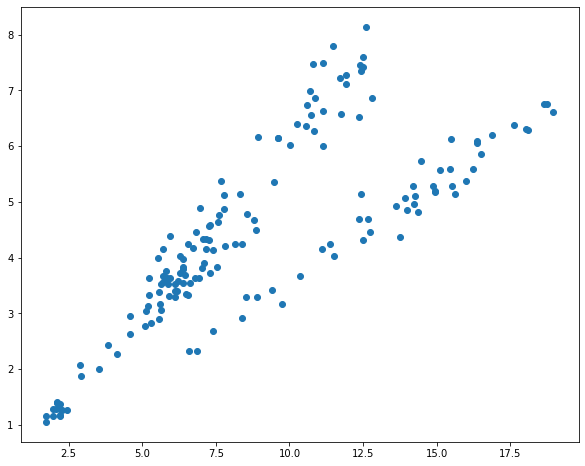

In [120]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [121]:
centers = []
for k in range(3):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

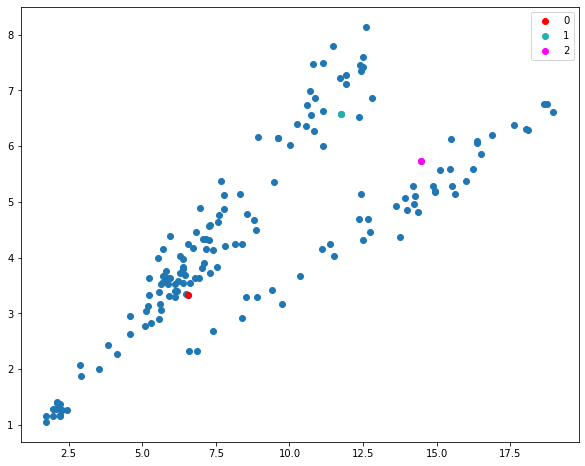

In [122]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.legend()
plt.show()

In [123]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

In [124]:
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

In [125]:
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

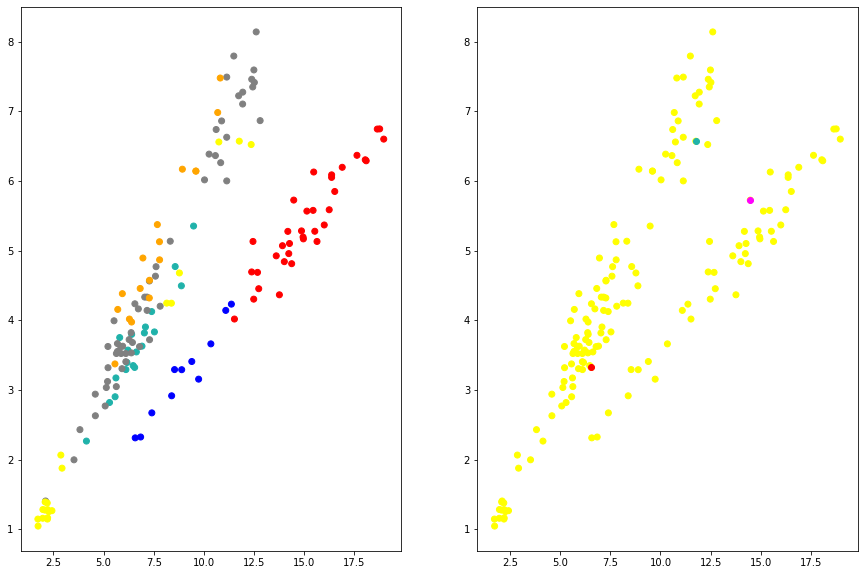

In [126]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "magenta", label = centers[2][2])
plt.show()

In [127]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

In [128]:
new_centers = update_centers(X, centers)

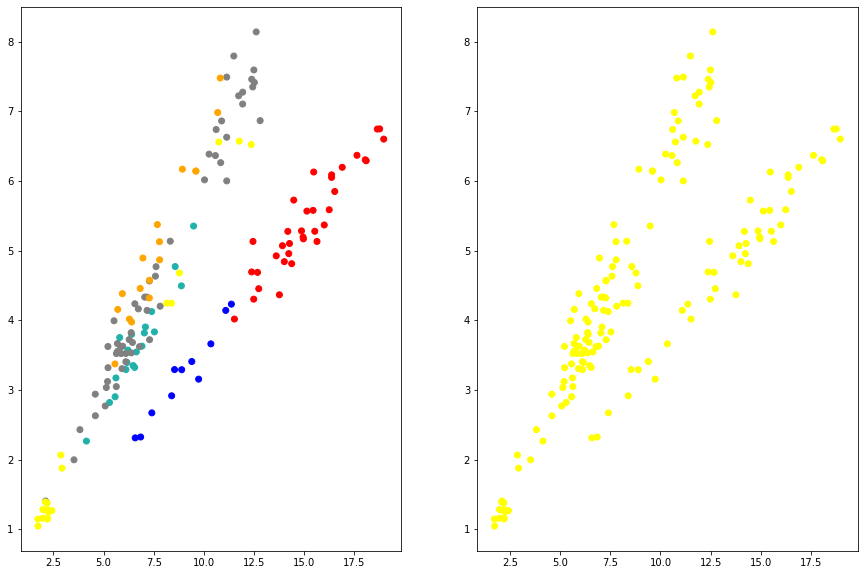

In [129]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)